In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

##### Helper Funtion 1 : Drop Columns

In [2]:
def drop_columns(df, column):
    return df.drop(columns = column, inplace = True, axis=1)

##### Helper Funtion 2 : Missing Value Summary

In [3]:
def find_missing(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    pct_missing = (df.isnull().sum()/len(df.index)).sort_values(ascending = False)
    missing_data_summary = pd.concat([total_missing, pct_missing],
                                    axis = 1, keys = ['Total Missing Records', 'Percentage'])
    return missing_data_summary.head(30)

In [4]:
def combine_columns(column1, column2,output_column):
     output_column = column1 + column2
     return output_column

In [5]:
def change_to_numeric_train(column,values,nums):
    df_train[column] = df_train[column].replace(values,nums)

In [6]:
def change_to_numeric_test(column,values,nums):
    df_test[column] = df_test[column].replace(values,nums)

In [7]:
def hist_scatter(df,feature):
    plt.figure(figsize=(25,10))

    plt.subplot(1,2,1)
    sns.histplot(data = df[feature], x = df[feature], color = '#ade8f4',kde = False, bins = 8) 
    plt.axvline(df[feature].mean(), color='r', linestyle='dashed', linewidth=5)
    plt.title(f'{feature} Distribution',size= 15)
    
    plt.subplot(1,2,2)
    sns.regplot(x = df['SalePrice'], y = df[feature], color ='#0077b6', line_kws={"color":"r"})
    plt.title(f'{feature} vs Sale Price', size=15)
    plt.xlabel('Sale Price', size = 12)
    plt.ylabel(f'{feature}',size = 12)

## Part 1. Read Data

In [8]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

In [9]:
df_train.shape

(2051, 81)

In [10]:
df_test.shape

(879, 80)

##### _The data sets contains 2051 instances along with 81 attributes._

In [11]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [13]:
df_train['Garage Cars'].unique()

array([ 2.,  1.,  3.,  0.,  4.,  5., nan])

In [14]:
df_train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


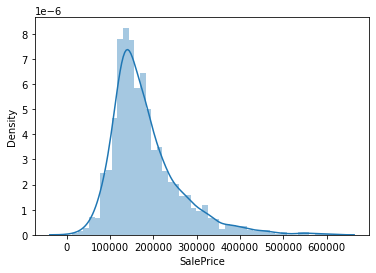

In [15]:
sns.distplot(df_train['SalePrice']);

In [16]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

##### _There are many columns in this dataset, to better understand the data, below have the columns separated into two groups as numerical columns and categorical columns._

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

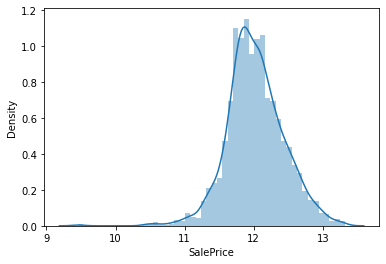

In [17]:
sns.distplot(df_train['SalePrice'])

##### _The value we are going to predit is `SalePrice` The first graphe above indicates the distribution is left skewed. For better result, taking a log calculation here to normalize the data distribution._

## Part 2. Data Cleaning

In [18]:
find_missing(df_train)

,Total Missing Records,Percentage
Pool QC,2042,0.995612
Misc Feature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
Fireplace Qu,1000,0.487567
Lot Frontage,330,0.160897
Garage Finish,114,0.055583
Garage Qual,114,0.055583
Garage Yr Blt,114,0.055583
Garage Cond,114,0.055583


##### _The table above provides a summary of missing values. Columns `Pool QC`, `Misc Feature`, `Alley`,`Fence` and `Fireplace Qu` have siginificant amount of missing values. It's hard to make a valid decision on how to  fullfill these missing data without impacting and further analysis. Therefore, these columns will be dropped from the dataframe._

##### _In addition, columns `Id` and `PID` are not relavent to our analysis, so they will also be dropped from the dataframe._

## Part 3. Deep Data Clearning & Feature Engineer

In [19]:
df_train["Bldg Type"] = df_train["Bldg Type"].replace(to_replace="2fmCon", value="2FmCon")
df_train["Bldg Type"] = df_train["Bldg Type"].replace(to_replace="Duplex", value="Duplx")
df_train["Bldg Type"] = df_train["Bldg Type"].replace(to_replace="Twnhs", value="TwnhsI")
df_train["Exterior 2nd"] = df_train["Exterior 2nd"].replace(to_replace="Brk Cmn", value="BrkComm")
df_train["Exterior 2nd"] = df_train["Exterior 2nd"].replace(to_replace="CmentBd", value="CemntBd")
df_train["Exterior 2nd"] = df_train["Exterior 2nd"].replace(to_replace="Wd Shng", value="WdShing")
df_train["MS Zoning"] = df_train["MS Zoning"].replace(to_replace="A (agr)", value="A")
df_train["MS Zoning"] = df_train["MS Zoning"].replace(to_replace="C (all)", value="C")
df_train["MS Zoning"] = df_train["MS Zoning"].replace(to_replace="I (all)", value="I")
df_train["Neighborhood"] = df_train["Neighborhood"].replace(to_replace="NAmes", value="Names")
df_train["Sale Type"] = df_train["Sale Type"].replace(to_replace="WD ", value="WD")

##### _Some columns above have some spelling issues and now are corrected._

In [20]:
df_train['FloorSqft'] = df_train['1st Flr SF']+df_train['2nd Flr SF']

In [21]:
df_test['FloorSqft'] = df_test['1st Flr SF']+df_test['2nd Flr SF']

In [22]:
df_train['Half Bath'].replace({1:0.5,2:1})
df_train['Bsmt Half Bath'].replace({1:0.5,2:1})
df_train['Total Bath'] = df_train['Half Bath']+df_train['Bsmt Half Bath']+df_train['Bsmt Full Bath']+df_train['Full Bath']

In [23]:
df_test['Half Bath'].replace({1:0.5,2:1})
df_test['Bsmt Half Bath'].replace({1:0.5,2:1})
df_test['Total Bath'] = df_test['Half Bath']+df_test['Bsmt Half Bath']+df_test['Bsmt Full Bath']+df_test['Full Bath']

In [24]:
df_train['total age'] = df_train['Yr Sold'] - df_train['Year Built']
df_train['remod age'] = df_train['Yr Sold'] - df_train['Year Remod/Add']

In [25]:
df_test['total age'] = df_test['Yr Sold'] - df_test['Year Built']
df_test['remod age'] = df_test['Yr Sold'] - df_test['Year Remod/Add']

In [26]:
df_train['garage age'] = df_train['Yr Sold'] - df_train['Garage Yr Blt']
df_test['garage age'] = df_test['Yr Sold'] - df_test['Garage Yr Blt']

In [27]:
df_train['Total Porch SF'] = df_train["3Ssn Porch"] + df_train["Enclosed Porch"] + df_train["Open Porch SF"]+ df_train["Screen Porch"] + df_train["Wood Deck SF"]

In [28]:
df_test['Total Porch SF'] = df_test["3Ssn Porch"] + df_test["Enclosed Porch"] + df_test["Open Porch SF"]+ df_test["Screen Porch"] + df_test["Wood Deck SF"]

##### _Above features can be combined together as one._

In [29]:
change_to_numeric_train('BsmtFin Type 1',['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],range(1,7))
df_train['BsmtFin Type 1'].fillna(0, inplace=True)

change_to_numeric_train('BsmtFin Type 2',['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                  range(1,7))
df_train['BsmtFin Type 2'].fillna(0, inplace=True)

change_to_numeric_train('Bsmt Exposure',['No','Mn','Av','Gd'],range(1,5))
df_train['Bsmt Exposure'].fillna(0, inplace= True)

In [30]:
change_to_numeric_test('BsmtFin Type 1',['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],range(1,7))
df_test['BsmtFin Type 1'].fillna(0, inplace=True)

change_to_numeric_test('BsmtFin Type 2',['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                  range(1,7))
df_test['BsmtFin Type 2'].fillna(0, inplace=True)

change_to_numeric_test('Bsmt Exposure',['No','Mn','Av','Gd'],range(1,5))
df_test['Bsmt Exposure'].fillna(0, inplace= True)

In [31]:
df_train['Lot Frontage'].fillna(0.0,inplace = True)
df_train['Mas Vnr Type'].fillna('None',inplace =True)
df_train['Mas Vnr Area'].fillna(0.0,inplace = True)

df_train['Garage Finish'] = df_train['Garage Finish'].replace(['Fin','RFn','Unf'],[3,2,1])
df_train['Garage Finish'].fillna(0,inplace=True)

df_train['Garage Type'].fillna('None', inplace = True)

In [32]:
df_test['Lot Frontage'].fillna(0.0,inplace = True)
df_test['Mas Vnr Type'].fillna('None',inplace =True)
df_test['Mas Vnr Area'].fillna(0.0,inplace = True)

df_test['Garage Finish'] = df_test['Garage Finish'].replace(['Fin','RFn','Unf'],[3,2,1])
df_test['Garage Finish'].fillna(0,inplace=True)

df_test['Garage Type'].fillna('None', inplace = True)

In [33]:
df_train.dropna(subset = ['Total Bath', 'Garage Area', 'Garage Cars'], inplace = True)

In [34]:
condition_rank ={'Ex':6,'Gd':5,'TA':4, 'Fa':3,'Po':2,'NA':1}
       #Ex   Excellent
       #Gd   Good
       #TA   Typical
       #Fa   Fair
       #Po   Poor
       #NA   No

In [35]:
df_train['Kitchen Qual'] = df_train['Kitchen Qual'].map(condition_rank)
df_train['Kitchen Qual'].fillna('NA',inplace = True)

In [36]:
df_test['Kitchen Qual'] = df_test['Kitchen Qual'].map(condition_rank)
df_test['Kitchen Qual'].fillna('NA',inplace = True)

In [37]:
df_train['Exter Qual'] = df_train['Exter Qual'].map(condition_rank)
df_train['Exter Qual'].fillna('NA',inplace = True)

In [38]:
df_test['Exter Qual'] = df_test['Exter Qual'].map(condition_rank)
df_test['Exter Qual'].fillna('NA',inplace = True)

In [39]:
df_train['Exter Cond'] = df_train['Exter Cond'].map(condition_rank)
df_train['Exter Cond'].fillna('NA',inplace = True)

In [40]:
df_test['Exter Cond'] = df_test['Exter Cond'].map(condition_rank)
df_test['Exter Cond'].fillna('NA',inplace = True)

In [41]:
df_train['Garage Qual'] = df_train['Garage Qual'].map(condition_rank)
df_train['Garage Qual'].fillna(0,inplace=True)

In [42]:
df_test['Garage Qual'] = df_test['Garage Qual'].map(condition_rank)
df_test['Garage Qual'].fillna(0,inplace=True)

In [43]:
df_train['Garage Cond'] = df_train['Garage Cond'].map(condition_rank)
df_train['Garage Cond'].fillna(0, inplace= True)

In [44]:
df_test['Garage Cond'] = df_test['Garage Cond'].map(condition_rank)
df_test['Garage Cond'].fillna(0,inplace=True)

In [45]:
df_train['Bsmt Cond'] = df_train['Bsmt Cond'].map(condition_rank)
df_train['Bsmt Cond'].fillna(0, inplace= True)

In [46]:
df_test['Bsmt Cond'] = df_test['Bsmt Cond'].map(condition_rank)
df_test['Bsmt Cond'].fillna(0,inplace=True)

In [47]:
df_train['Bsmt Qual'] = df_train['Bsmt Qual'].map(condition_rank)
df_train['Bsmt Qual'].fillna(0,inplace=True)

In [48]:
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].map(condition_rank)
df_test['Bsmt Qual'].fillna(0,inplace=True)

##### _In this dataframe, some features represent the quality/condition/type can be convert to ordinal variables._

In [49]:
cat_columns = df_train.select_dtypes(include = object).keys()
cat_columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Functional', 'Fireplace Qu',
       'Garage Type', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [50]:
drop_columns(df_train,['1st Flr SF','2nd Flr SF','Bsmt Full Bath','Bsmt Half Bath',
                       'Full Bath','Half Bath','Mo Sold','Year Built','Yr Sold','Year Remod/Add',
                        "3Ssn Porch",'Enclosed Porch','Open Porch SF','Screen Porch','Wood Deck SF','Garage Yr Blt','Id','PID','Pool Area','garage age'])

In [51]:
drop_columns(df_test,['1st Flr SF','2nd Flr SF','Bsmt Full Bath','Bsmt Half Bath',
                       'Full Bath','Half Bath','Mo Sold','Year Built','Yr Sold','Year Remod/Add',
                        "3Ssn Porch",'Enclosed Porch','Open Porch SF','Screen Porch','Wood Deck SF','Garage Yr Blt','garage age'])

#### Detect Outliers

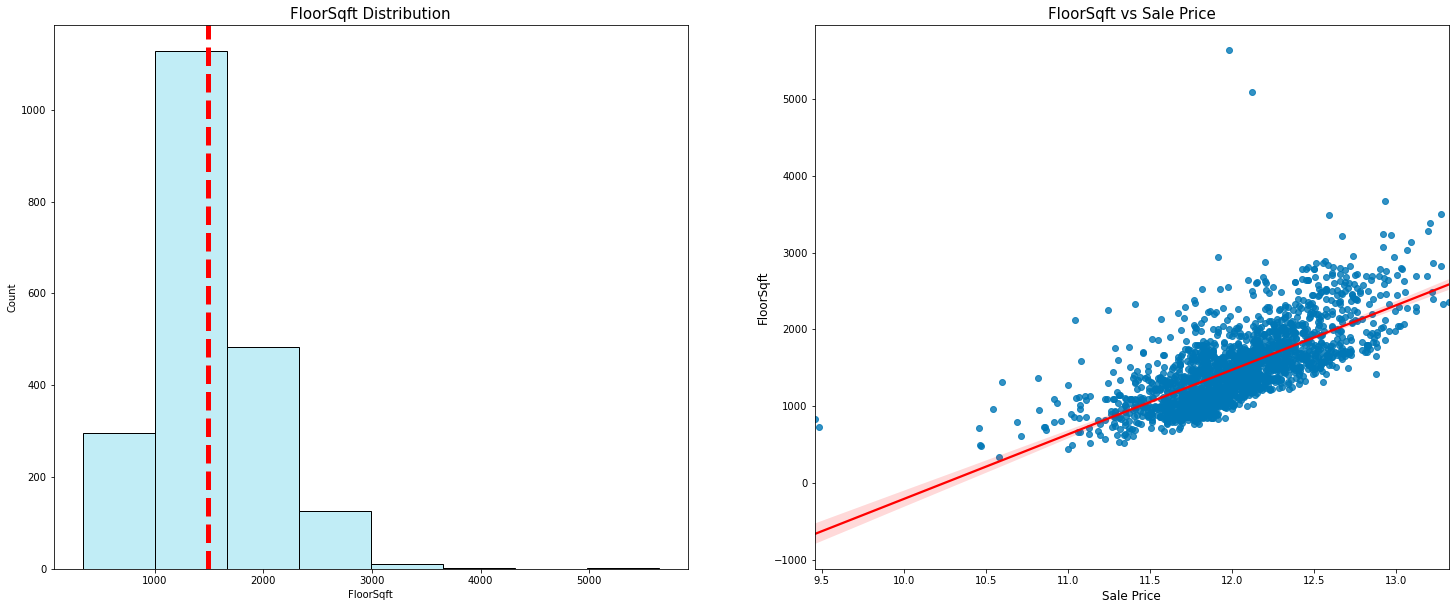

In [52]:
hist_scatter(df_train, 'FloorSqft')
plt.savefig('images/Total_price')

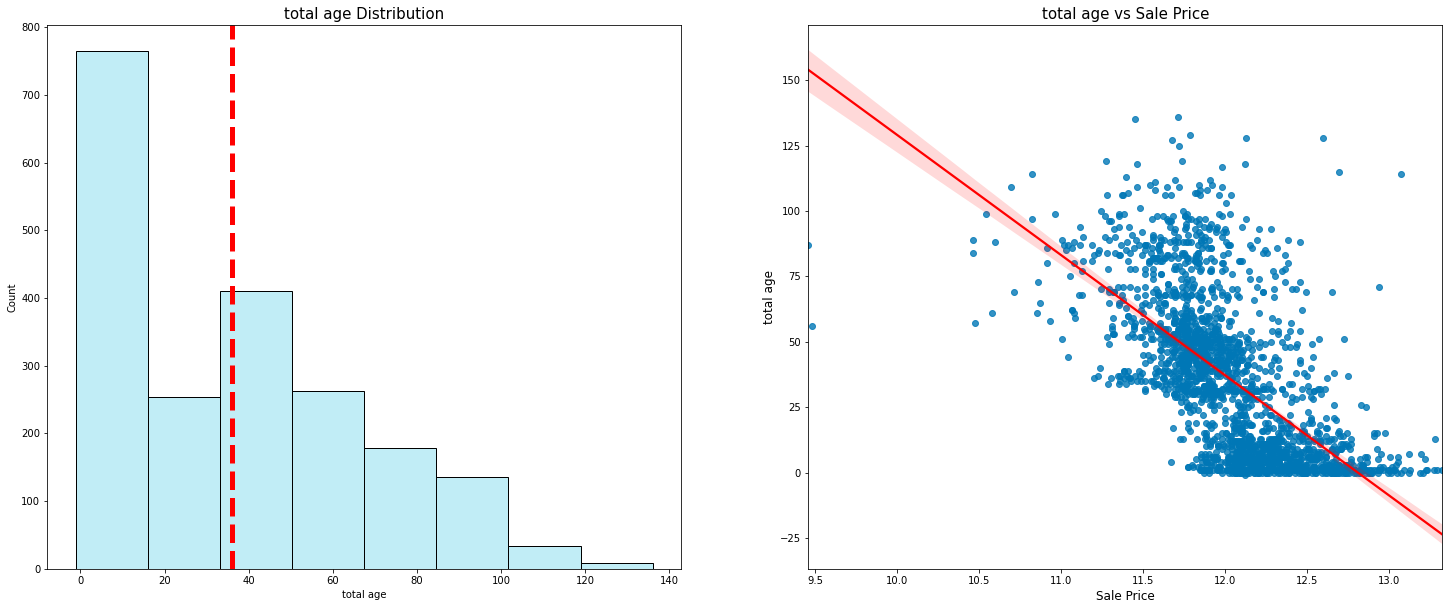

In [53]:
hist_scatter(df_train, 'total age')
plt.savefig('images/total age')

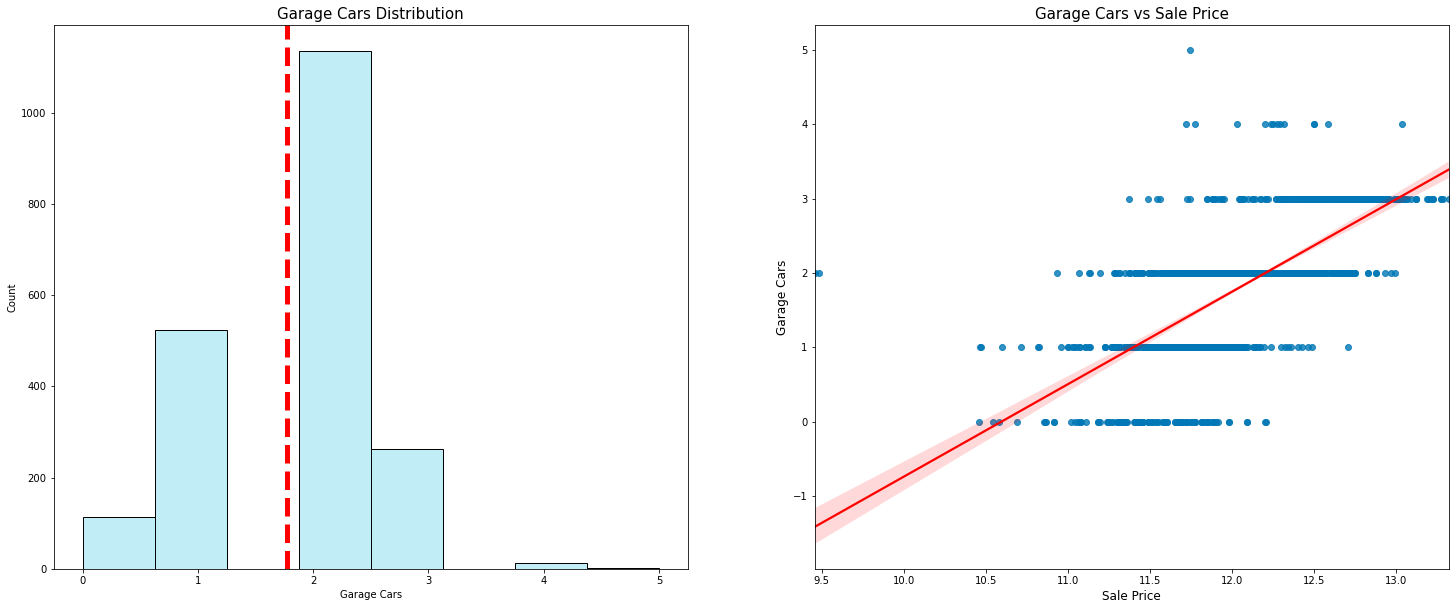

In [54]:
hist_scatter(df_train, 'Garage Cars')
plt.savefig('images/garagecars')

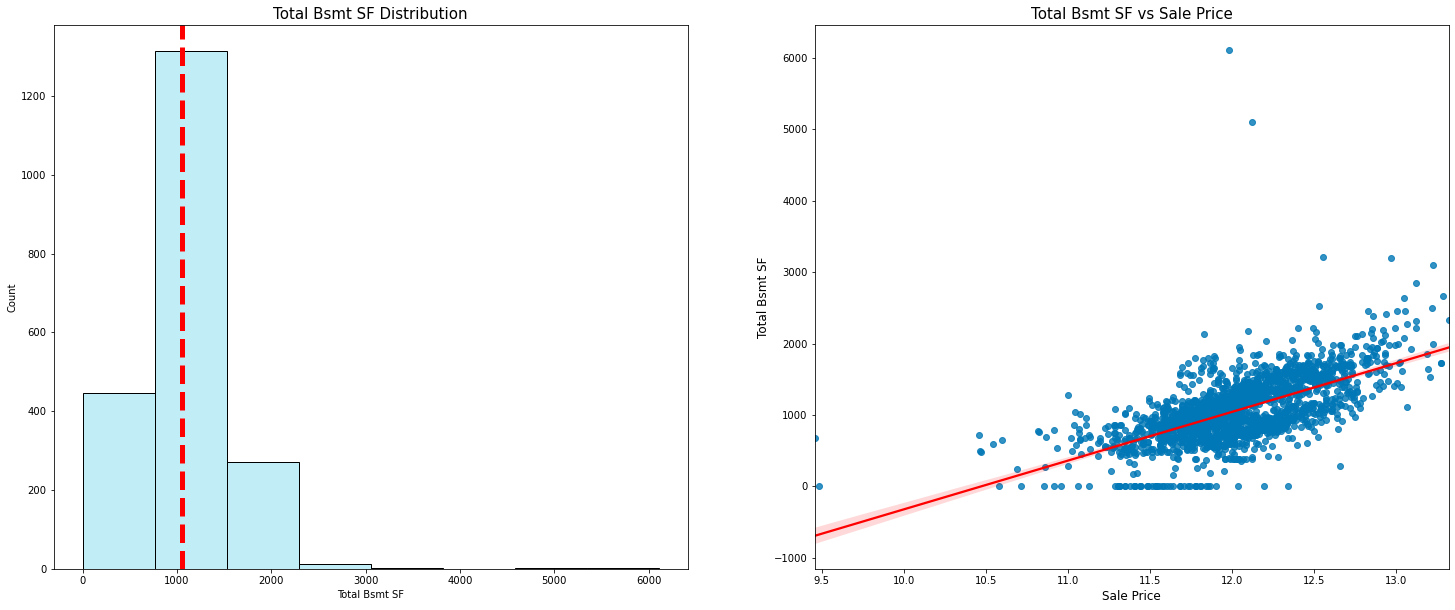

In [55]:
hist_scatter(df_train, 'Total Bsmt SF')
plt.savefig('images/totalbsmt')

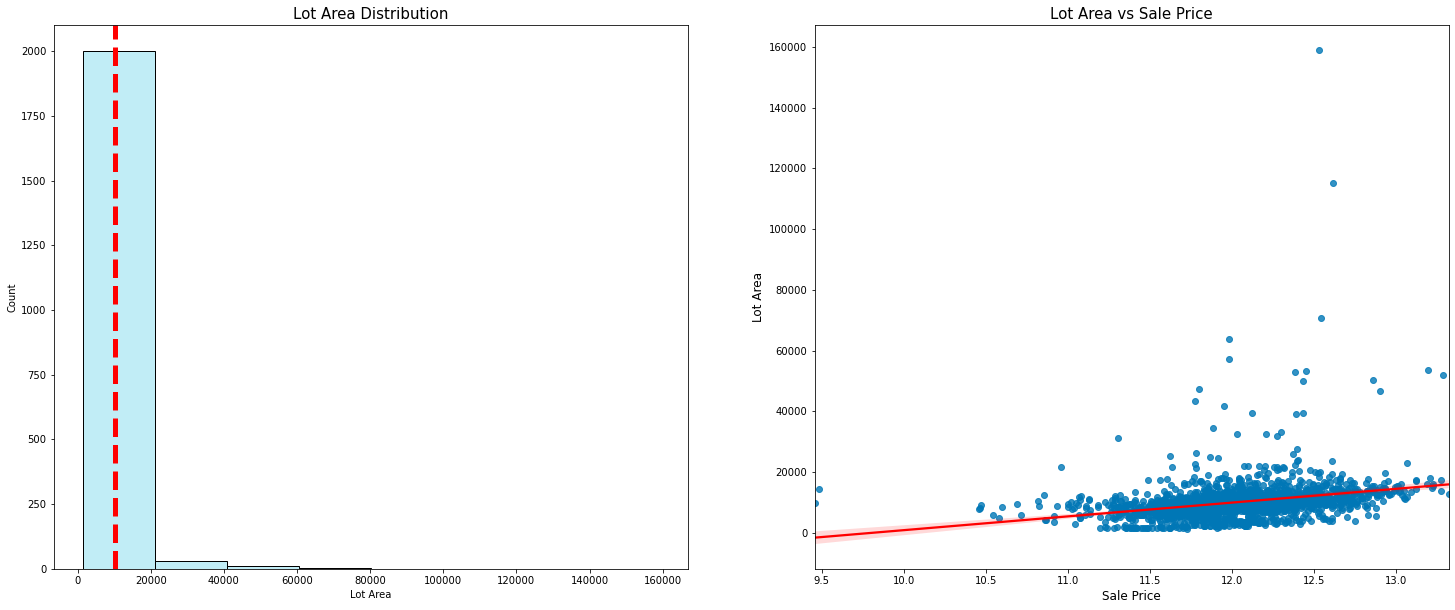

In [56]:
hist_scatter(df_train,'Lot Area')
plt.savefig('images/lotArea')

##### _From the scatter plot, outliers are observed._

In [57]:
# df_train['Garage Cars'].max() this is used to find what is the outlier
#df_train['Lot Area'].max()

In [58]:
index_drop1 = df_train[df_train['FloorSqft'] == 5642].index

In [59]:
index_drop2 = df_train[df_train['FloorSqft'] == 5095].index

In [60]:
index_drop3 = df_train[df_train['Garage Cars'] == 5].index

In [61]:
index_drop4 = df_train[df_train['Lot Area'] == 159000].index

In [62]:
index_drop5 = df_train[df_train['Lot Area'] == 115149].index

In [63]:
index_drop6 = df_train[df_train['Lot Area'] == 70761].index

In [64]:
df_train.drop(index_drop1, inplace = True)

In [65]:
df_train.drop(index_drop2, inplace = True)

In [66]:
df_train.drop(index_drop3, inplace = True)

In [67]:
df_train.drop(index_drop4, inplace = True)

In [68]:
df_train.drop(index_drop5, inplace = True)

In [69]:
df_train.drop(index_drop6, inplace = True)

##### _Outliers are now removed._

In [70]:
find_missing(df_train[cat_columns])

,Total Missing Records,Percentage
Pool QC,2034,0.996082
Misc Feature,1979,0.969148
Alley,1902,0.931440
Fence,1644,0.805093
Fireplace Qu,997,0.488247
MS Zoning,0,0.000000
Exterior 2nd,0,0.000000
Paved Drive,0,0.000000
Garage Type,0,0.000000
Functional,0,0.000000


##### _Now, all the missing values are ouliers are clearned._

In [71]:
con_var = []
dis_var = []
var_unique = df_train.nunique()
for var,var_num in enumerate(var_unique):
    if var_num>50:
        con_var.append(var)
    else:
        dis_var.append(var)

con_columns=[df_train.columns[i] for i in con_var ]
dis_columns=[df_train.columns[i] for i in dis_var ]

##### _This dataframe has 81 original columns (features). It's very important to seperate them by their datatype for future correlation analysis. In the above step, a threshold of 50 is set to differentiate the continous variables and discrete variables.To futher explain, if the column has more than 50 unique values, it's defined as continous variable and the rest is discrete_

In [72]:
pearson = df_train[con_columns].corr(method = 'pearson')
pearson_corr = pearson['SalePrice'].sort_values(ascending = False)
pearson_corr.to_csv('./datasets/pearson_corr.csv')
pearson_corr

SalePrice         1.000000
FloorSqft         0.719364
Gr Liv Area       0.709482
Garage Area       0.658185
Total Bsmt SF     0.657114
Mas Vnr Area      0.448033
BsmtFin SF 1      0.428506
Total Porch SF    0.401539
Lot Area          0.333069
Bsmt Unf SF       0.194944
Lot Frontage      0.150462
BsmtFin SF 2      0.027229
remod age        -0.600926
total age        -0.626524
Name: SalePrice, dtype: float64

In [73]:
dis_columns.append('SalePrice')

In [74]:
spearman = df_train[dis_columns].corr(method = 'spearman')
spearman_corr = spearman['SalePrice']
spearman_corr.to_csv('./datasets/spearman_corr.csv')
spearman_corr

MS SubClass       -0.004272
Overall Qual       0.809006
Overall Cond      -0.161163
Exter Qual         0.699990
Exter Cond         0.029388
Bsmt Qual          0.700406
Bsmt Cond          0.281694
Bsmt Exposure      0.382435
BsmtFin Type 1     0.414581
BsmtFin Type 2     0.041988
Low Qual Fin SF   -0.085404
Bedroom AbvGr      0.186768
Kitchen AbvGr     -0.150105
Kitchen Qual       0.684292
TotRms AbvGrd      0.503228
Fireplaces         0.523124
Garage Finish      0.637711
Garage Cars        0.703132
Garage Qual        0.368552
Garage Cond        0.341747
Misc Val          -0.037436
Total Bath         0.690987
SalePrice          1.000000
Name: SalePrice, dtype: float64

##### _Based on the natural of different numerical variables, Pearson correlation is performed amount continous variables and Spearman correlation is performed amount discrete variables._

###

#### Correlation Plotting

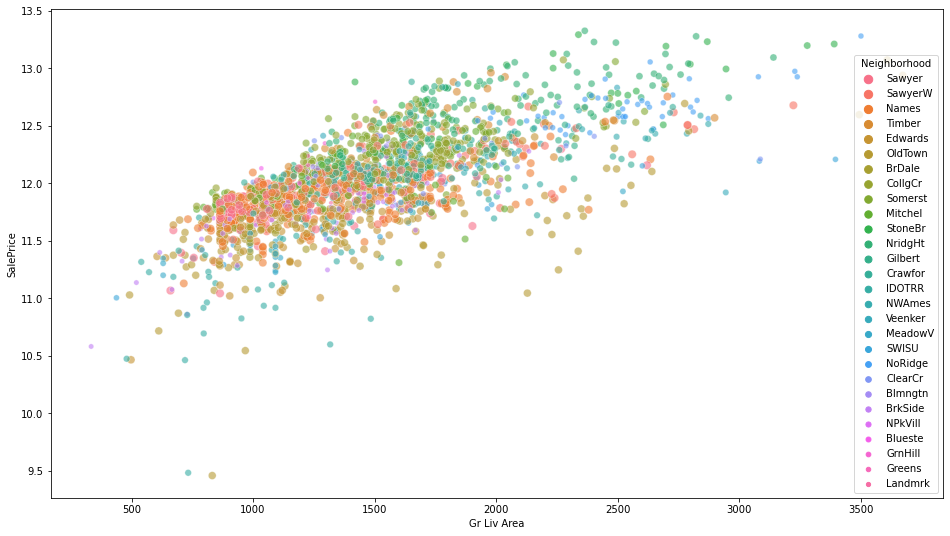

In [75]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="Gr Liv Area", y="SalePrice", hue="Neighborhood", size = 'Neighborhood',s=15, alpha = 0.6,data=df_train);
scatter_fig = fig.get_figure()
scatter_fig.savefig('images/saleprice_Grliv_neigh')

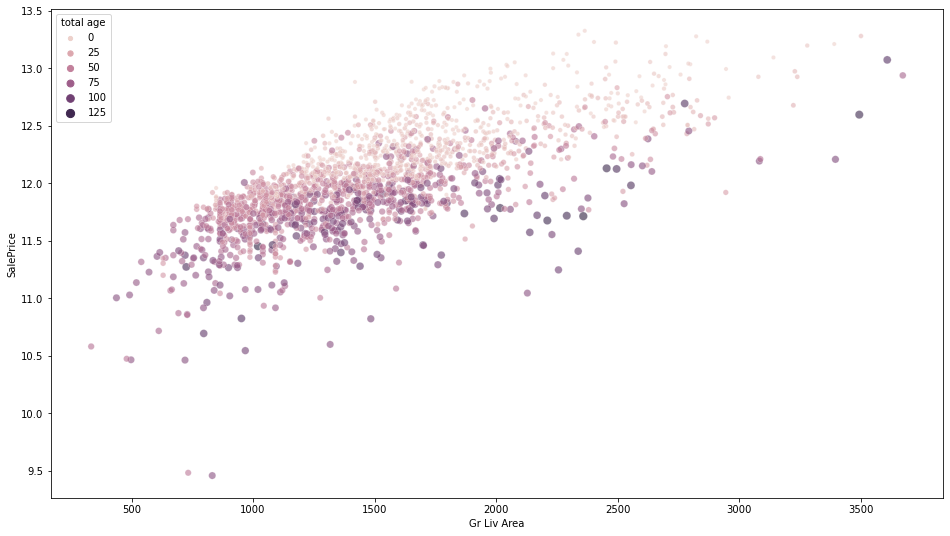

In [76]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="Gr Liv Area", y="SalePrice", hue="total age", size = 'total age',s=15, alpha = 0.6,data=df_train);
scatter_fig = fig.get_figure()
scatter_fig.savefig('images/grlivarea_saleprice')

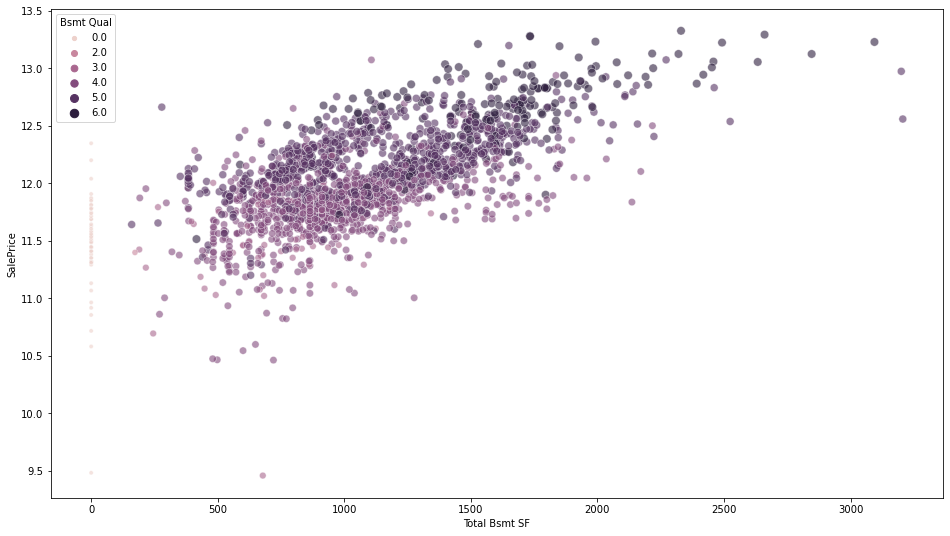

In [77]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="Total Bsmt SF", y="SalePrice", hue="Bsmt Qual", size = 'Bsmt Qual',s=15, alpha = 0.6,data=df_train);
scatter_fig = fig.get_figure()
scatter_fig.savefig('images/basement_sp')

##### _Based on the natural of different numerical variables, Pearson correlation is performed amount continous variables and Spearman correlation is performed amount discrete variables._

In [78]:
feature_d = pd.get_dummies(df_train[cat_columns])

In [79]:
feature_dum = feature_d.columns.tolist()

In [80]:
for var in cat_columns:
    for_dummy = df_train.pop(var)
    for_dummy2 =df_test.pop(var)
    df_train = pd.concat([df_train, pd.get_dummies(for_dummy, prefix=var)], axis=1)
    df_test = pd.concat([df_test, pd.get_dummies(for_dummy2, prefix=var)], axis=1)

##### _Now, there are still numbers of columns has not been converted to numerical values. To convert them, will help for more detailed analysis based on these features._

#### Filter Features

In [81]:
def corr_filter(filename,threshold):
    import csv
    list_add =[]
    with open(f'./datasets/{filename}', 'r') as f:
        reader = csv.reader(f)
        next(f)
        for i in reader:
            if abs(float(i[1])) > threshold:
                list_add.append(i[0])
    return list_add
    f.close()

##### _This function helps create a filter to re-through the correlation information saved for different attributes. Out feature selection will be based on the correlation between all the features with our the output `SalePrice`_

In [82]:
feature_con = corr_filter ('pearson_corr.csv', 0.6)
feature_con.remove('SalePrice')
feature_con

['FloorSqft',
 'Gr Liv Area',
 'Garage Area',
 'Total Bsmt SF',
 'remod age',
 'total age']

In [83]:
feature_dis = corr_filter ('spearman_corr.csv', 0.6)
feature_dis.remove('SalePrice')
feature_dis

['Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Kitchen Qual',
 'Garage Finish',
 'Garage Cars',
 'Total Bath']

In [84]:
df_train_new = df_train.to_csv('datasets/train_new.csv')

In [85]:
feature_lasso = corr_filter('lasso_coef.csv', 0.002)

##### _The `feature_lasso` is the file we saved in our first model run. The first run on `Lasso Regression` contains all the features we have collected in this dataframe. After the first run, all the lasso coefs are collected. A filter on the lasso coef provides the importance rankings._

In [86]:
feature_select = feature_dis + feature_con + feature_lasso

##### _Now, based on the 3 filters on corrleation values, we have concluded our features for our prediction above._

In [87]:
feature = [i for i in feature_select if i in df_train.columns and i in df_test.columns] 
# for dummied variables, it may have variables in the train set but not in the test. This formula helps to find the common attributes. 

In [88]:
feature # This is our final selected features list. 

['Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Kitchen Qual',
 'Garage Finish',
 'Garage Cars',
 'Total Bath',
 'FloorSqft',
 'Gr Liv Area',
 'Garage Area',
 'Total Bsmt SF',
 'remod age',
 'total age',
 'Overall Qual',
 'Exter Qual',
 'Kitchen Qual',
 'Garage Finish',
 'Garage Cars',
 'Total Bath',
 'BsmtFin SF 1',
 'Gr Liv Area',
 'Garage Area',
 'FloorSqft',
 'total age',
 'remod age',
 'Total Porch SF',
 'MS Zoning_RL',
 'Lot Config_CulDSac',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Condition 1_Artery',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_RRNn',
 'Bldg Type_1Fam',
 'House Style_2.5Unf',
 'House Style_SFoyer',
 'House Style_SLvl',
 'Roof Style_Mansard',
 'Roof Matl_WdShngl',
 'Exterior 1st_AsbShng',
 'Exterio

#### Linear Regression Model

In [89]:
X =df_train[feature]
y = df_train['SalePrice']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [91]:
scaler = preprocessing.MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test_num = scaler.transform(df_test[feature])

In [93]:
lr = LinearRegression()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [95]:
cross_val_score(LinearRegression(), X_train, y_train, cv = 5).mean()

0.8931407047751193

In [96]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
lr.score(X_train, y_train)

0.9116742377860059

In [98]:
lr.score(X_test, y_test)

0.9090075432873618

In [99]:
mean_squared_error(y_train, lr.predict(X_train))

0.014556645704776914

In [100]:
mean_squared_error(y_test, lr.predict(X_test))

0.016223304076298562

In [101]:
k_lr = lr.predict(df_test[feature])

In [102]:
k_lr = np.exp(k_lr)

In [103]:
sub_lr = pd.DataFrame({'id' : df_test['Id'],
                           'Saleprice':k_lr})

In [104]:
sub_lr.to_csv('datasets/sub_lr.csv', index = False)

#### Lasso Regression Model (L1 Regularization)

In [105]:
X =df_train[feature]
y = df_train['SalePrice']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [107]:
scaler = preprocessing.MinMaxScaler()

In [108]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test_num = scaler.transform(df_test[feature])

In [109]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(n_alphas = 100)

In [110]:
lasso.fit(X_train, y_train)

LassoCV()

In [111]:
lasso.score(X_train, y_train)

0.913529645756428

In [112]:
lasso.score(X_test, y_test)

0.9051444537286497

In [113]:
mean_squared_error(y_train, lasso.predict(X_train))

0.01449560628954873

In [114]:
mean_squared_error(y_test, lasso.predict(X_test))

0.016364502566001925

In [115]:
lasso.coef_

array([ 4.56629471e-01,  6.32774519e-02, -0.00000000e+00,  9.11464699e-02,
        3.34764472e-03,  6.93342598e-02,  4.81994826e-02,  3.08604747e-01,
        5.45571987e-01,  5.81597273e-02,  2.92999240e-01, -9.85900988e-02,
       -4.40458856e-02,  1.29379457e-01,  1.36548622e-02,  3.88565829e-04,
        2.84584784e-03,  5.46396151e-03,  4.74130682e-03,  2.35051178e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.74418156e-01,  2.97436006e-02,  2.48112093e-02,
       -6.91629224e-02,  5.15548008e-02,  9.26912701e-02, -3.86274248e-02,
       -7.89520514e-02, -1.45096515e-01,  6.05584721e-02, -3.81286465e-02,
       -4.04942754e-02,  4.11405297e-02,  8.35003876e-02,  1.89711907e-02,
       -3.63590672e-02,  2.13443318e-02,  8.58666847e-02, -3.28956737e-02,
        5.28394050e-02,  5.83098835e-02,  3.79892943e-02,  2.93449504e-02,
       -1.30632254e-01,  6.07870532e-02, -1.52524556e-01, -1.17347868e-01,
        7.79680567e-02, -

In [137]:
columns=['feature','coef']
lasso_coef =pd.DataFrame([df_test[feature].columns,lasso.coef_]).T
lasso_coef.columns=columns
list_lasso = lasso_coef[lasso_coef.coef.isin([0])]
lasso_coef.to_csv('./datasets/lasso_coef.csv', index = False)

##### _The aboved is the only calculated on our first run when all features are included. The purpose is to save all the lasso coefficient to rank the features_ 

In [117]:
sub_lasso = lasso.predict(df_test_num)

In [118]:
sub_lasso = np.exp(sub_lasso)

In [119]:
sub_lasso = pd.DataFrame({'id' : df_test['Id'],
                           'Saleprice':sub_lasso})

In [120]:
sub_lasso.to_csv('datasets/sub_lasso.csv', index = False)

#### Ridge Regression Model (L2 Regularization)

In [121]:
X_train =df_train[feature]
y_train = df_train['SalePrice']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [123]:
scaler = preprocessing.MinMaxScaler()

In [124]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test_num = scaler.transform(df_test[feature])

In [125]:
reg=linear_model.Ridge(alpha = 0.01,fit_intercept=True)

In [126]:
reg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [127]:
reg.score(X_train, y_train)

0.9159690355512091

In [128]:
reg.score(X_test, y_test)

0.8997681555600616

In [129]:
mean_squared_error(y_train, reg.predict(X_train))

0.014086674993253986

In [130]:
mean_squared_error(y_test, reg.predict(X_test))

0.01729202287065304

In [131]:
sub_ridge=reg.predict(df_test_num)

In [132]:
sub_ridge = np.exp(sub_ridge)

In [133]:
sub_ridge = pd.DataFrame({'id' : df_test['Id'],
                           'Saleprice':sub_ridge})

In [134]:
sub_ridge.to_csv('./datasets/sub_ridge.csv', index = False)

#### Model Summary

##### _Based on the MSE value we abserved above across all 3 models. The Lasso Regression Model is the most accurate prediction model. L1 regularization sets the least important feature's penalty coefficient to 0 which helps for feature optimizations._

##### _As we now decide to use the Lasso Regression Model, We can understand what feature is most important and what is least important._

In [135]:
df_lasso = pd.DataFrame(columns = ['Feature', 'Coef','Abs Coef'])
df_lasso['Abs Coef'] = abs(lasso.coef_)
df_lasso['Coef'] = lasso.coef_
df_lasso['Feature'] = feature

Text(0.5, 1.0, 'Top 30 Housing Features')

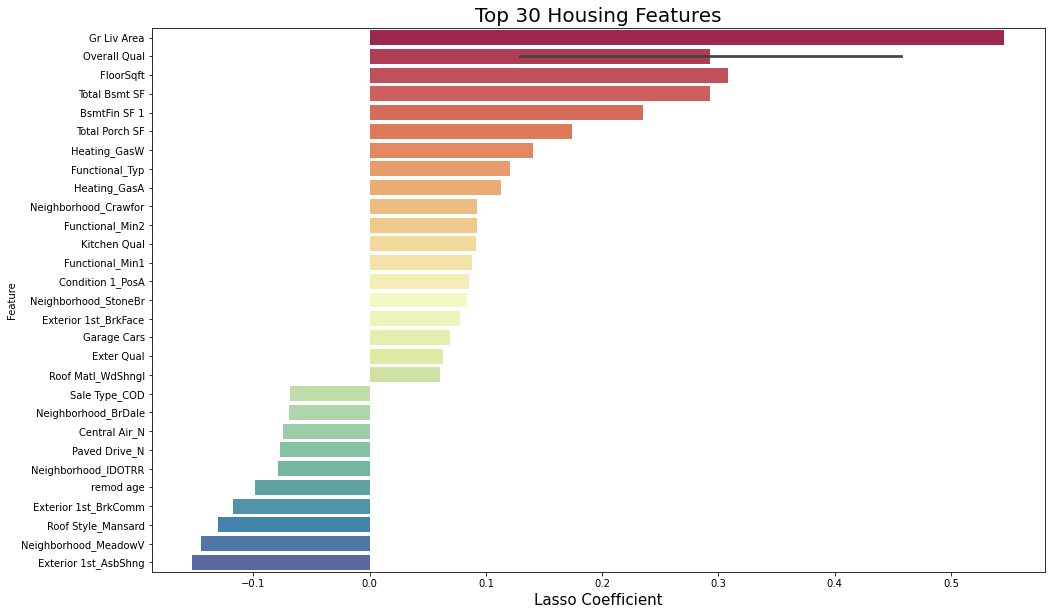

In [136]:
fig2 = plt.figure(figsize = (16, 10))
df = df_lasso.sort_values(by ='Abs Coef', ascending = False).head(30)[['Feature','Coef']].sort_values(by = 'Coef', ascending = False).reset_index(drop = True)
ax = sns.barplot(data = df, y ='Feature', x = 'Coef', orient = 'h', palette = 'Spectral' )

ax.set_xlabel('Lasso Coefficient', fontsize = 15)
plt.title('Top 30 Housing Features', fontsize = 20)


### Summary 

#### _Based on the Lasso Cofficient, we can conclude, that `Gr Liv Area` has the largest positivly impact the housing price. And `Exterior 1st_AsbShng` which is Asbestos Shingles largest negatively impact the housing prices._

#### _In addition, `remod age` also negatively impact the housing price. Therefore, a advice can be conclude to house sellers that remodel the house can increase the house price. `Exterior 1st_AsbShng` represent a roofing material called 'Asbestos Shingles' which is a very popular meterical in 1990s. This is also a indication the house may be old._